### 로지스틱 회귀(Logistic Regrssion)
- $y = ax_1 + bx_2 + cx_3 + dx_4 + ex_5 + f$
- y값이 연속적인 값이면 예측 회귀
- 무한대가 나오는것을 분류를 위해 0~1사이로 매핑(0.5를 기준으로 양성과 음성으로 분류함)
- 선형회귀로 예측선을 그으면 점들의 특성을 잘 나타내지 못함 - 왜냐면 점들은 1과 0 사이의 값이 없으니까!
- 점들의 특성을 정확하게 담안려면 직선이 나닌 S자 형태
- 선형회귀와 마찬가지로 적절한 선을 그리는데 직선이 아닌 S자 형태

시그모이드
- s자 형태로 그래프가 그려지는 함수
- 로지스틱 함수 방정식
- $\frac{1}{1+e^-x}$
- $e$는 자연상수라고 불리는 무리수의 값 파이같은 존재
- 결국 구해야되는 값은 자연상수 $e$의 지수인 $-x$

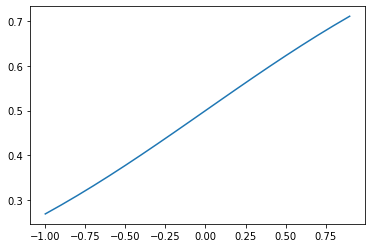

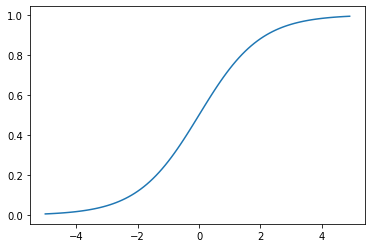

<ipython-input-2-61bd4b687c63>:17: RuntimeWarning: overflow encountered in exp
  phi = 1/(1+np.exp(-z))


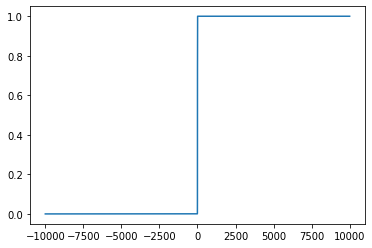

In [2]:
# 로지스틱 회귀 시그모디으 함수
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-1,1,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.show()


z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.show()

z = np.arange(-10000,10000,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.show()


### 이진분류

In [3]:
# 로지스틱 회귀 이진분류
# 이진 분류를 위해 생성 7가지중 도미랑 빙어만 추출

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish = pd.read_csv('https://bit.ly/fish_csv_data')

# Boolean indexing 으로 조건문으로 가지고 true false 해서 indexing하기
char_arr = np.array(['A','B','C','D','E'])
bool_index = char_arr[[True,False,True,False,False]]
bool_index

# 도미 빙어 적용
fish_input = fish[['Weight', 'Length','Diagonal','Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
  fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_semlt = train_scaled[bream_smelt_indexes]
target_bream_semlt = train_target[bream_smelt_indexes]
# bream 과 smelt 값만 
print(train_bream_semlt) 
# 종이 bream과 smelt 값만
target_bream_semlt

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [5]:
from sklearn.linear_model import LogisticRegression
# 모델 생성
lr = LogisticRegression()
lr.fit(train_bream_semlt, target_bream_semlt)

# train으로 예측해보기
print(lr.predict(train_bream_semlt[:5]))

# 확률 보기
# 도미랑 빙어밖에 없어서 2개의 확률을 더하면 1이 됨
lr.predict_proba(train_bream_semlt[:5])

# KNN 분류애서는 타겟을 설정했었음 도미를 1로 빙어를 0으로
# 타겟 데이터 문자는 라벨링을 해야됨

# 나눈 클래스(분류 y값 보기)
lr.classes_

# 도미를 1로 하고싶을땐 
# np.where(target_bream_semlt == 'Bream',1.0)

f'기울기 :{lr.coef_}, 절편 : {lr.intercept_}' 
# 무게 길이 대각선 높이 두께

# 1/1 + e^-z의 z값 구하기 ->

# decision_function은 z값만으로 판단가능(양수 음수)
decisions = lr.decision_function(train_bream_semlt[:5])
print(decisions)

# 시그모이드 출력값(확률값 비교)
# predict_porb 함수는 z값을 시그모이드로 통과시켜 확률
from scipy.special import expit
expit(decisions)

# 보면 로지스틱이 이진분류이면 양성값(방어 1) 확률만 계산 -> 음성(방어 0)은 1에서 빼면 됨

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])